# Data preparation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csvFile = r'..\data\global_inflation_data.csv'
df = pd.read_csv(csvFile)
dfT = pd.melt(df.drop(columns=['indicator_name']), id_vars='country_name', var_name='Year', value_name='Inflation')

In [19]:
print(dfT.dtypes)

country_name     object
Year             object
Inflation       float64
dtype: object


# Country inflation analysis

## Brazil inflation

In [20]:
dfBrazil = dfT[dfT['country_name'] == 'Brazil']
dfBrazil.head(10)

,country_name,Year,Inflation
24,Brazil,1980,90.2
220,Brazil,1981,101.7
416,Brazil,1982,100.6
612,Brazil,1983,135.0
808,Brazil,1984,192.1
1004,Brazil,1985,226.0
1200,Brazil,1986,147.1
1396,Brazil,1987,228.3
1592,Brazil,1988,629.1
1788,Brazil,1989,1430.7


In [15]:
dfBrazil[dfBrazil['Year'] == '1994']

,country_name,Year,Inflation
2768,Brazil,1994,2075.8


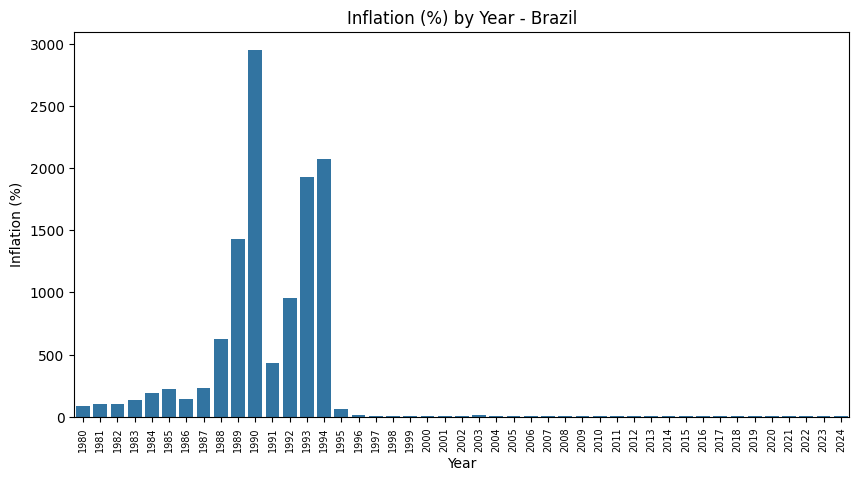

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "Year", y = "Inflation", data = dfBrazil)
plt.title("Inflation (%) by Year - Brazil", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()

### Pontos importantes a serem considerados

Plano real teve início em primeiro de julho de 1994.  
A inflação em junho de 1994 chegou a 4.922% no acumulado de 12 meses.  
Para o efeito desse estudo será utilizado os dados de inflação a partir de 1996.

In [23]:
dfBrazil95 = dfBrazil[dfBrazil['Year'] > '1995']

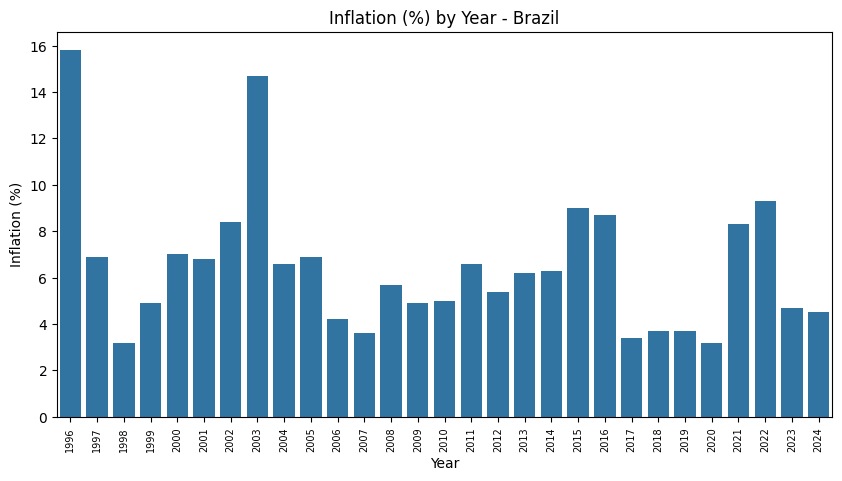

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "Year", y = "Inflation", data = dfBrazil95)
plt.title("Inflation (%) by Year - Brazil", fontsize = 12)
plt.xticks(rotation=90, fontsize = 7)
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")

plt.show()

## Filter the dataset, excluding the period before 1996

In [25]:
# IRR Iranian Rial
# XAF Central African CFA
# XOF West African CFA
# JPY Japanese Yen
# RUB Russian Rouble
# INR Indian Rupee
# CNY Chinese
# BRL Brazilian Real
# ILS Israel Shekel
# XCD East Caribbean Dollar
# USD U.S. Dollar
# AUD Australian Dollar
# NZD New Zealand Dollar
# EUR Euro
# CHF Swiss Franc
# KWD Kuwait Dinar

currencies = {
    'IRR': ['Iran'],
    'XAF': ['Cameroon', 'Central African Republic', 'Chad', 'Republic of the Congo', 'Equatorial Guinea', 'Gabon'],
    'XOF': ['Benin', 'Burkina Faso', 'Guinea-Bissau', 'Ivory Coast', 'Mali', 'Niger', 'Senegal', 'Togo'],
    'JPY': ['Japan'],
    'RUB': ['Russia'],
    'INR': ['India'],
    'CNY': ['China'],
    'BRL': ['Brazil'],
    'ILS': ['Israel'],
    'XCD': ['Anguilla', 'Antigua and Barbuda', 'Dominica', 'Grenada', 'Montserrat', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines'],
    'USD': ['United States', 'East Timor', 'Ecuador', 'El Salvador', 'Federated States of Micronesia', 'Marshall Islands', 'Palau', 'Panama', 'Zimbabwe'],
    'AUD': ['Australia', 'Kiribati', 'Nauru', 'Tuvalu'],
    'NZD': ['New Zealand', 'Cook Islands', 'Niue', 'Pitcairn Islands', 'Tokelau'],
    'EUR': ['Austria', 'Belgium', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'],
    'CHF': ['Switzerland', 'Liechtenstein'],
    'KWD': ['Kuwait']
}


,country_name,Year,Inflation
79,Iran,1980,20.6
275,Iran,1981,24.2
471,Iran,1982,18.7
667,Iran,1983,19.7
863,Iran,1984,12.6
1059,Iran,1985,4.4
1255,Iran,1986,23.7
1451,Iran,1987,27.7
1647,Iran,1988,28.9
1843,Iran,1989,17.4


In [ ]:
IRR
XAF
XOF
JPY
RUB
INR
CNY
BRL
ILS
XCD
USD
AUD
NZD
EUR
CHF
KWD